In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Movie Recommendation System/Data processing /Datasets/netflix_titles.csv')

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

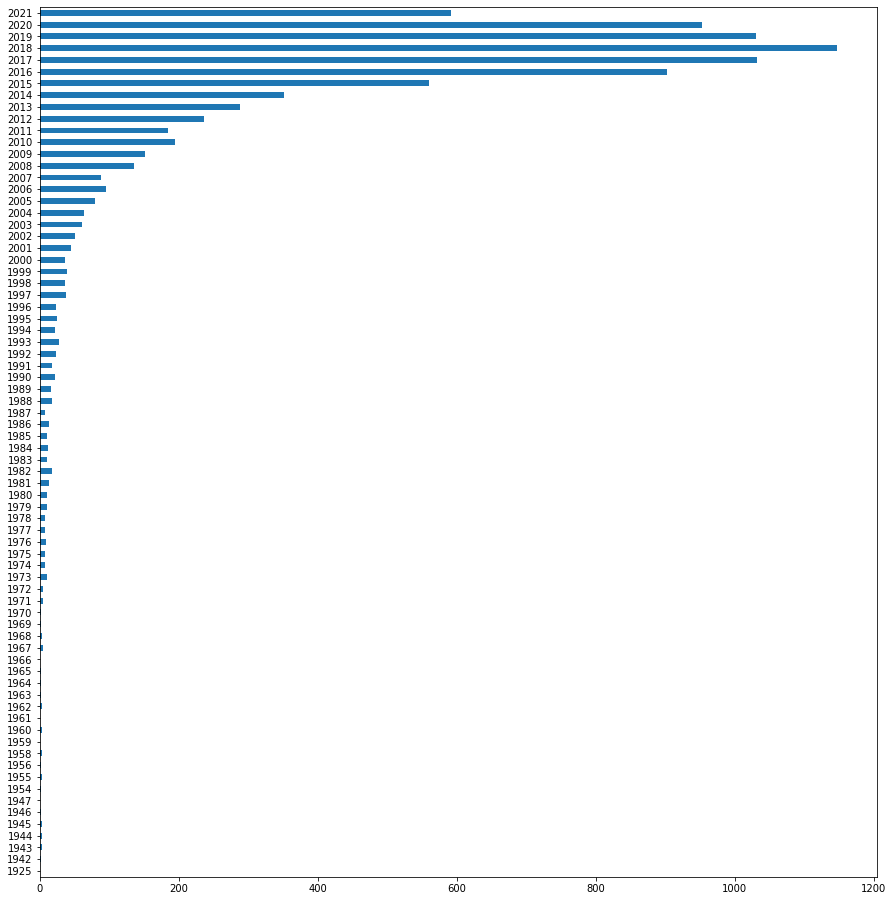

In [ ]:
data.release_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))

In [ ]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
data.drop(['show_id','date_added','release_year','duration','description'],axis=1,inplace=True)

In [ ]:
data.head()

,type,title,director,cast,country,rating,listed_in
0,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,PG-13,Documentaries
1,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,TV-MA,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,TV-MA,"Docuseries, Reality TV"
4,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
data.isna().sum()

type            0
title           0
director     2634
cast          825
country       831
rating          4
listed_in       0
dtype: int64

In [ ]:
#as director as a lot of na values and does not have a logical way to replace it is getting rempved

In [ ]:
data.drop(['director'],axis=1,inplace=True)

In [ ]:
data.country.fillna('unknown',inplace=True)

In [ ]:
data.cast.fillna('unknown',inplace=True)

In [ ]:
data.isna().sum()

type         0
title        0
cast         0
country      0
rating       4
listed_in    0
dtype: int64

In [ ]:
data.groupby('type')

In [ ]:
data.head()

,type,title,cast,country,rating,listed_in
0,Movie,Dick Johnson Is Dead,unknown,United States,PG-13,Documentaries
1,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,TV-MA,"International TV Shows, TV Dramas, TV Mysteries"
2,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown,TV-MA,"Crime TV Shows, International TV Shows, TV Act..."
3,TV Show,Jailbirds New Orleans,unknown,unknown,TV-MA,"Docuseries, Reality TV"
4,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,TV-MA,"International TV Shows, Romantic TV Shows, TV ..."


In [ ]:
data['cast_list'] = data['cast'].map(lambda x : x.split(','))

In [ ]:
data['cast_list'] = data['cast_list'].map(lambda x : x[:3])

In [ ]:
data['cast_list'] = data['cast_list'].map(lambda x : ' '.join(str(ele) for ele in x))

In [ ]:
data['cast'] = data['cast_list']

In [ ]:
data['title']=data['title'].map(lambda x:x.lower())

In [ ]:
data['cast']=data['cast'].map(lambda x:x.lower())
data['country']=data['country'].map(lambda x:x.lower())
data['listed_in']=data['listed_in'].map(lambda x:x.lower())

In [ ]:
data['combination'] = data['type'] + ' ' + data['rating'] + ' ' + data['listed_in'] +' ' + data['country'] +' ' + data['cast']

In [ ]:
data.head()

,type,title,cast,country,rating,listed_in,cast_list,combination
0,Movie,dick johnson is dead,unknown,united states,PG-13,documentaries,unknown,Movie PG-13 documentaries united states unknown
1,TV Show,blood & water,ama qamata khosi ngema gail mabalane,south africa,TV-MA,"international tv shows, tv dramas, tv mysteries",Ama Qamata Khosi Ngema Gail Mabalane,"TV Show TV-MA international tv shows, tv drama..."
2,TV Show,ganglands,sami bouajila tracy gotoas samuel jouy,unknown,TV-MA,"crime tv shows, international tv shows, tv act...",Sami Bouajila Tracy Gotoas Samuel Jouy,"TV Show TV-MA crime tv shows, international tv..."
3,TV Show,jailbirds new orleans,unknown,unknown,TV-MA,"docuseries, reality tv",unknown,"TV Show TV-MA docuseries, reality tv unknown u..."
4,TV Show,kota factory,mayur more jitendra kumar ranjan raj,india,TV-MA,"international tv shows, romantic tv shows, tv ...",Mayur More Jitendra Kumar Ranjan Raj,"TV Show TV-MA international tv shows, romantic..."


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
data = data.dropna(axis=0,how='any')

In [ ]:
data_movies = data[data['type']=='Movie']
data_tv_show = data[data['type']=="TV Show"]

In [ ]:
data_movies.reset_index(drop=True,inplace=True)

In [ ]:
data_tv_show.reset_index(drop=True,inplace=True)

In [ ]:
def create_similarity_movie():
  data = data_movies
  cv = CountVectorizer()
  count_matrix = cv.fit_transform(data['combination'])
  similarity = cosine_similarity(count_matrix)
  return data,similarity

In [ ]:
def create_similarity_TV_show():
  data = data_tv_show
  cv = CountVectorizer()
  count_matrix = cv.fit_transform(data['combination'])
  similarity = cosine_similarity(count_matrix)
  return data,similarity

In [ ]:
def rcmd(m):
    m = m.lower()
    try:
        data.head()
        similarity.shape
    except:
      if m in data_movies['title'].unique():
        data, similarity = create_similarity_movie()
      elif m in data_tv_show['title'].unique():
        data, similarity = create_similarity_TV_show()
      else:
        data, similarity = create_similarity_movie()
    if m not in data['title'].unique():
        return('Sorry! The movie you requested is not in our database. Please check the spelling or try with some other movies')
    else:
        i = data.loc[data['title']==m].index[0]
        lst = list(enumerate(similarity[i]))
        lst = sorted(lst, key = lambda x:x[1] ,reverse=True)
        lst = lst[1:11] # excluding first item since it is the requested movie itself
        l = []
        for i in range(len(lst)):
            a = lst[i][0]
            l.append(data['title'][a])
        return l

In [ ]:
data_movies.to_csv('netflix_movie.csv',index=False)

In [ ]:
data_tv_show.to_csv('netflix_tv_show.csv',index=False)

# Amazon dataset

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Movie Recommendation System/Data processing /Datasets/amazon_prime_titles.csv')

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


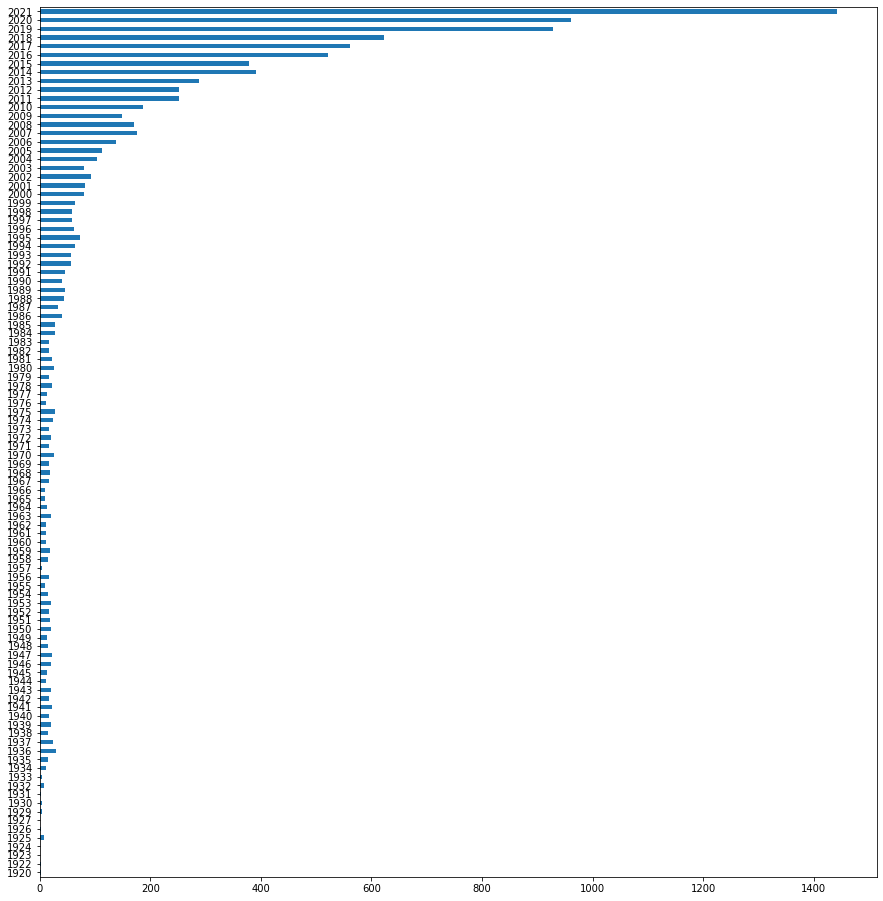

In [ ]:
data.release_year.value_counts(dropna=False).sort_index().plot(kind='barh',figsize=(15,16))

In [ ]:
data.drop(['show_id','date_added','release_year','duration','description'],axis=1,inplace=True)


In [ ]:
data.head()

,type,title,director,cast,country,rating,listed_in
0,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,NaN,"Comedy, Drama"
1,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,13+,"Drama, International"
2,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,NaN,"Action, Drama, Suspense"
3,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,NaN,Documentary
4,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,NaN,"Drama, Fantasy"


In [ ]:
data.isna().sum()

type            0
title           0
director     2082
cast         1233
country      8996
rating        337
listed_in       0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   type       9668 non-null   object
 1   title      9668 non-null   object
 2   director   7586 non-null   object
 3   cast       8435 non-null   object
 4   country    672 non-null    object
 5   rating     9331 non-null   object
 6   listed_in  9668 non-null   object
dtypes: object(7)
memory usage: 528.8+ KB


In [ ]:
# as countries and director both have large number of nan values they are droped
data.drop(labels=['director','country'],axis=1,inplace=True)

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   type       9668 non-null   object
 1   title      9668 non-null   object
 2   cast       8435 non-null   object
 3   rating     9331 non-null   object
 4   listed_in  9668 non-null   object
dtypes: object(5)
memory usage: 377.8+ KB


In [ ]:
data.isna().sum()


type            0
title           0
cast         1233
rating        337
listed_in       0
dtype: int64

In [ ]:
data.cast.fillna('unknown',inplace=True)

In [ ]:
data.rating.fillna('unknown',inplace=True)

In [ ]:
data['cast']=data['cast'].map(lambda x:x.lower())
data['listed_in']=data['listed_in'].map(lambda x:x.lower())
data['title']=data['title'].map(lambda x:x.lower())

In [ ]:
data['cast_list'] = data['cast'].map(lambda x : x.split(','))
data['cast_list'] = data['cast_list'].map(lambda x : x[:3])
data['cast_list'] = data['cast_list'].map(lambda x : ' '.join(str(ele) for ele in x))
data['cast'] = data['cast_list']
data.drop(labels=['cast_list'],axis=1,inplace=True)

In [ ]:
data['combination'] = data['type'] + ' ' + data['rating'] + ' ' + data['listed_in'] +' ' + data['cast']


In [ ]:
data.tail()

,type,title,cast,rating,listed_in,combination
9663,Movie,pride of the bowery,leo gorcey bobby jordan,7+,comedy,Movie 7+ comedy leo gorcey bobby jordan
9664,TV Show,planet patrol,dick vosburgh ronnie stevens libby morris,13+,tv shows,TV Show 13+ tv shows dick vosburgh ronnie ste...
9665,Movie,outpost,ray stevenson julian wadham richard brake,R,action,Movie R action ray stevenson julian wadham r...
9666,TV Show,maradona: blessed dream,esteban recagno ezequiel stremiz luciano vit...,TV-MA,"drama, sports","TV Show TV-MA drama, sports esteban recagno e..."
9667,Movie,harry brown,michael caine emily mortimer joseph gilgun,R,"action, drama, suspense","Movie R action, drama, suspense michael caine ..."


In [ ]:
amazom_movie = data[data['type']=='Movie']
amazom_tv_show = data[data['type']=='TV Show']


In [ ]:
amazom_movie.to_csv("amazon_movie.csv",index=False)

In [ ]:
amazom_tv_show.to_csv("amazon_tv_show.csv",index=False)